In [1]:
%load_ext autoreload
%autoreload 2

# Purpose Visualize DND 5E Maps

# 0.0 Imports 

In [32]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

#specialized 
from matplotlib.transforms import Affine2D
from matplotlib.patches import Ellipse

#cartography
from matplotlib.textpath import TextPath
from matplotlib.patches import PathPatch
from matplotlib.font_manager import FontProperties 

In [3]:
from Alger import * 

# 1.0 experiment

## 1.1 Transformation 

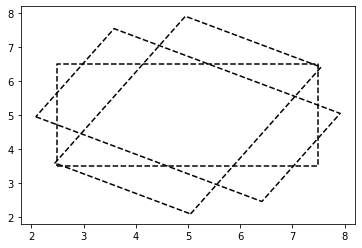

In [21]:
#inputs
center = np.array([5,5])
size = np.array([5,3])

#build corners and split out array
T = size / 2 * [(-1,-1),(1,-1),(1,1),(-1,1),(-1,-1)]

for o in [-30,60,0]:

    #rotate
    rotation = Affine2D().rotate_deg(o)

    #rotate points around the center 
    P = center + rotation.transform(T)

    #plt points
    plt.plot(P[:,0],P[:,1],"k--")

plt.show()

## 1.2 Pie Image 

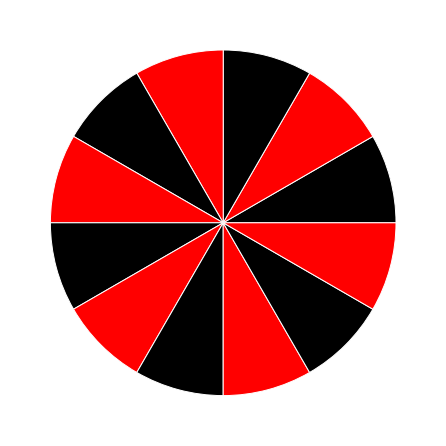

In [28]:
#parameters 
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0,0,1,1],aspect=1)

#make pie image
ax.pie(np.ones(12),radius=1,colors=["black","red"]*6,wedgeprops=dict(width=1,edgecolor="w"))

plt.show()

## 1.3 Cartography Linear Lines 

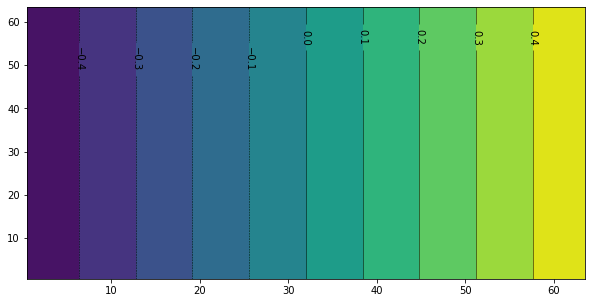

In [39]:


#data for plot
n = 64
X, Y = np.meshgrid(np.linspace(-0.5 + 0.5/n, 0.5 - 0.5/n,n),
                   np.linspace(-0.5 + 0.5/n, 0.5 - 0.5/n,n))

#plt.figure
fig= plt.figure(figsize=(10,5))
l= 10

#plt colors
plt.contourf(X,origin="lower",levels=l)

#plot labels
CS = plt.contour(X,origin="lower",levels=l,colors="black",linewidths=0.5)
ax.clabel(CS,CS.levels)

plt.show()

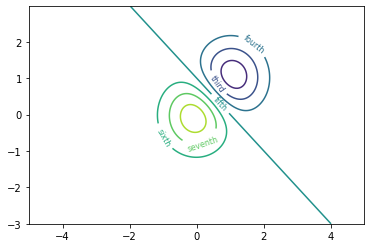

In [91]:
# n= 100
# x= np.linspace(-3,3,n)
# y = np.linspace(-3,3,n)
# X,Y = np.meshgrid(x,y)

# def f(x,y):
#     return (1-x/2 + x **5 + y**3) * np.exp(-(x**2)- y ** 2)

delta = 0.025
x = np.arange(-5,5.0,delta)
y = np.arange(-3,3.0,delta)
X,Y = np.meshgrid(x,y)
Z1 = np.exp(-X**2 - Y **2)
Z2 = np.exp(-(X-1)**2 - (Y-1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()

#plt x coordinate ,y coordiante, adnd z coordiante (all lines)
CS = ax.contour(X,Y,Z)

# add labels
labs = ["first","second","third","fourth","fifth","sixth","seventh","eighth"]

fmt = {}
for l,s in zip(CS.levels, labs):
    fmt[l] = s
    
ax.clabel(CS,CS.levels,inline=True,fmt=fmt,fontsize=8)

plt.show()


# 1.4 Random Map

Experiment with overlapping shapes

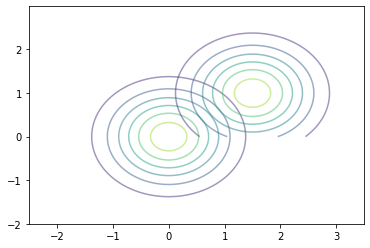

In [148]:
s=0.01

#inputs for plot 1
def imager(x,y):
    z1,z2 = np.meshgrid(x,y)
    z3 = np.exp(-z1**2 - z2 **2)
    return z1,z2,z3

aa,ab,ac = imager(np.arange(-2,2,s),np.arange(-2,2,s))
ba,bb,bc = imager(np.arange(-4,2,s),np.arange(-1,2,s))

fig, ax = plt.subplots()

#plt x coordinate ,y coordiante, adnd z coordiante (all lines)
CS = ax.contour(aa,ab,ac,alpha=0.5)
CS2 = ax.contour(ba+1.5,bb+1,bc,alpha=0.5)

plt.show()




Experiment with combined shapes

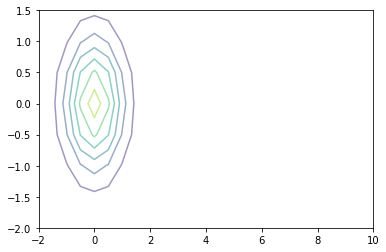

In [171]:
s=0.5

#inputs for plot 1
def imager(x,y):
    z1,z2 = np.meshgrid(x,y)
    z3 = np.exp(-z1**2 - z2 **2)
    return z1,z2,z3

# aa,ab,ac = imager(np.arange(-2,2,s),np.arange(-2,2,s))
# ba,bb,bc = imager(np.arange(-2,2,s),np.arange(-2,2,s))

fig, ax = plt.subplots()

#plt x coordinate ,y coordiante, adnd z coordiante (all lines)
CS = ax.contour(np.maximum(aa,ba),
                np.maximum(ab,bb),
                np.maximum(ac,bc),alpha=0.5)

plt.show()




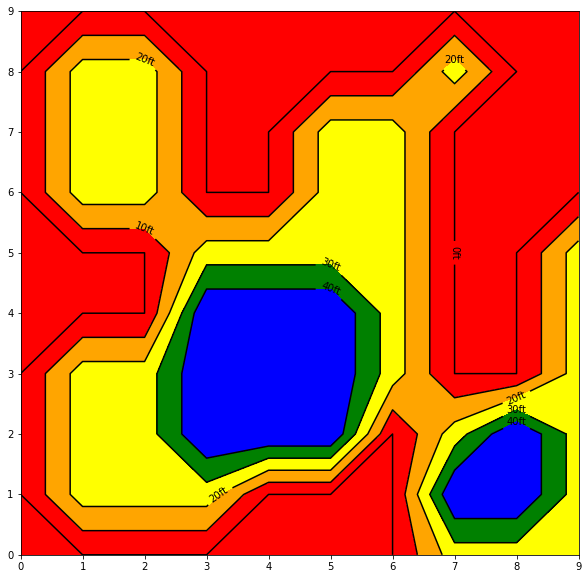

In [248]:
axa = np.array([0,1,2,3,4,5,6,7,8,9])
byb = np.array([0,1,2,3,4,5,6,7,8,9])
axa,byb =np.meshgrid(axa,byb)
czc = np.array([
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 1],
       [0, 0, 0, 2, 2, 2, 1, 0, 0, 1],
       [0, 1, 1, 2, 2, 2, 1, 0, 0, 1],
       [0, 1, 1, 2, 2, 2, 0, 1, 2, 1],
       [0, 1, 1, 1, 0, 0, 0, 2, 2, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]])[::-1]


level_counter = 5

fig, ax = plt.subplots(figsize=(10,10))

#plout areas
CS = ax.contourf(axa,byb,czc,levels=level_counter,colors=['Red','Orange','Yellow','Green','Blue','Purple'])

#plt lines
# add labels
labs = [str(x)+"ft" for x in np.arange(0,200,10)]

fmt = {}
for l,s in zip(CS.levels, labs):
    fmt[l] = s
    
CS1 = ax.contour(axa,byb,czc,colors="black",origin="lower",levels=level_counter)
ax.clabel(CS1,CS1.levels,inline=True,fmt=fmt,fontsize=10)
plt.show()